In [ ]:
import zipfile

# Ruta del archivo zip
archivo_zip = "Dataset.zip"

# Ruta del directorio de destino para la extracción
directorio_destino = ""

# Descomprimir el archivo zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)


In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import os
import glob

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, path, pattern):
        self.class_names = {}
        self.class_id = 0
        self.x = []
        self.y = []
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

        for d in glob.glob(os.path.join(path, '*')):
            clname = os.path.basename(d)
            for f in glob.glob(os.path.join(d, pattern)):
                if clname not in self.class_names:
                    self.class_names[clname] = self.class_id
                    self.class_id += 1

                img = Image.open(f)
                img = self.transform(img)

                for i in range(4):
                    img_rotated = img.rot90(i, [1, 2])
                    self.x.append(img_rotated)
                    self.y.append(self.class_names[clname])

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]



In [ ]:
path = "Dataset"
pattern = "*.jpg"
dataset = CustomDataset(path, pattern)

In [ ]:
BATCH_SIZE = 32
TRAIN_SIZE = int(len(dataset)*0.9)
VAL_SIZE = len(dataset) - TRAIN_SIZE

In [ ]:
print(TRAIN_SIZE, VAL_SIZE)

806 90


In [ ]:
train_dataset, val_dataset = random_split(dataset, [TRAIN_SIZE, VAL_SIZE])

In [ ]:
print(len(train_dataset), len(val_dataset))

806 90


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
imgs, labels  = next(iter(train_loader))
print(imgs.shape, labels.shape)

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(i, x.shape, y.shape)
    if i==9: break

0 torch.Size([32, 3, 224, 224]) torch.Size([32])
1 torch.Size([32, 3, 224, 224]) torch.Size([32])
2 torch.Size([32, 3, 224, 224]) torch.Size([32])
3 torch.Size([32, 3, 224, 224]) torch.Size([32])
4 torch.Size([32, 3, 224, 224]) torch.Size([32])
5 torch.Size([32, 3, 224, 224]) torch.Size([32])
6 torch.Size([32, 3, 224, 224]) torch.Size([32])
7 torch.Size([32, 3, 224, 224]) torch.Size([32])
8 torch.Size([32, 3, 224, 224]) torch.Size([32])
9 torch.Size([32, 3, 224, 224]) torch.Size([32])


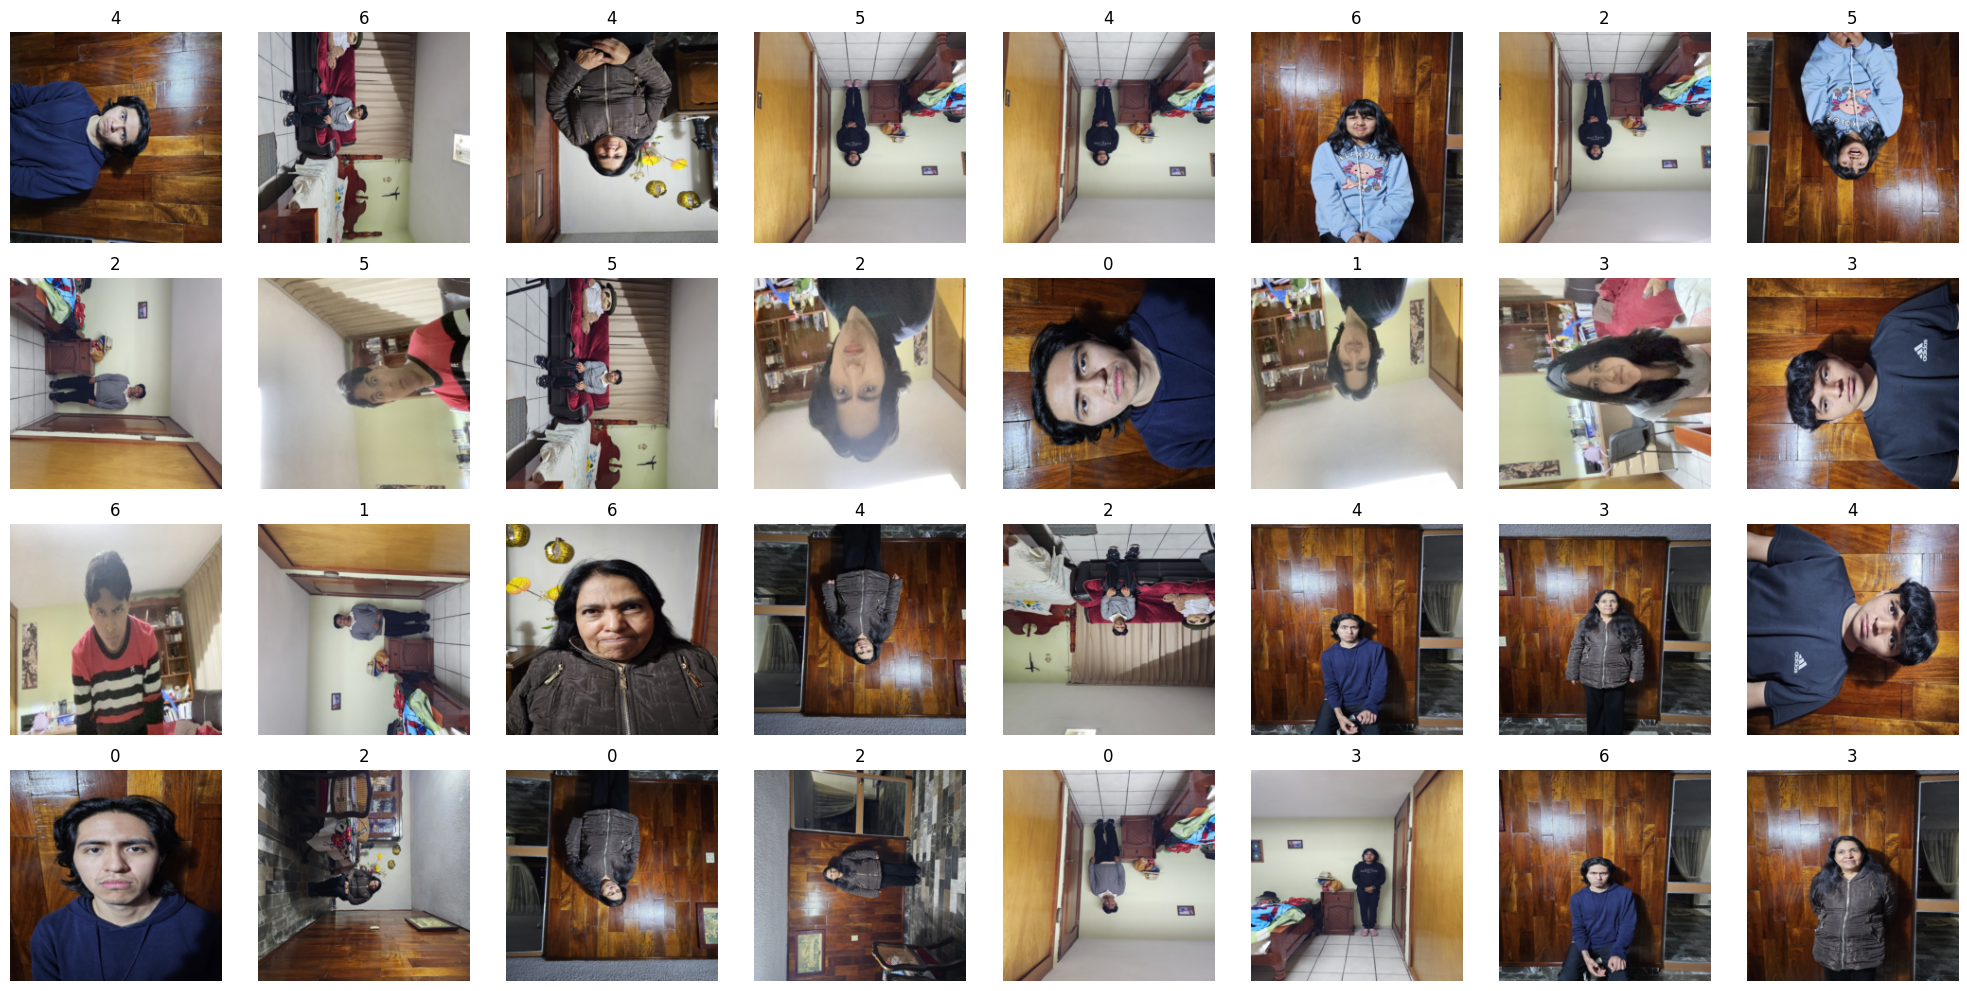

In [ ]:
import matplotlib.pyplot as plt

imgs, masks = next(iter(train_loader))


def plot_mini_batch(imgs, texts):
    plt.figure(figsize=(20, 10))
    for i in range(len(texts)):
        plt.subplot(4, 8, i + 1)
        img = imgs[i, ...].permute(1, 2, 0).numpy()
        text = texts[i].item() if isinstance(texts[i], torch.Tensor) else texts[i]

        plt.imshow(img)
        plt.title(str(text))

        plt.axis('Off')

    plt.tight_layout()
    plt.show()

plot_mini_batch(imgs, masks)